In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

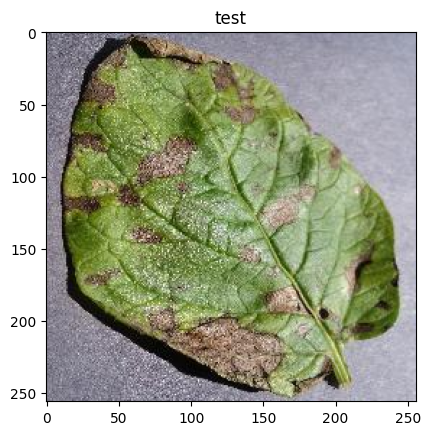

In [16]:
import cv2
image_path = 'test/test/PotatoEarlyBlight1.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('test')
plt.show()

In [17]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [18]:
prediction = model.predict(input_arr)
prediction, prediction.shape

1/1 [==============================] - 0s 32ms/step


(array([[5.7153972e-15, 2.0119013e-17, 1.6336115e-11, 4.5617641e-19,
         8.6251576e-20, 1.1344468e-13, 6.5485363e-23, 1.2915248e-10,
         5.8927008e-10, 3.2117414e-10, 4.0450637e-18, 1.8494080e-12,
         2.9122089e-12, 2.6218419e-10, 3.1680061e-23, 8.3387535e-16,
         2.2649054e-08, 5.9110571e-15, 2.8213449e-12, 2.9121450e-14,
         9.9999976e-01, 3.5549983e-14, 4.6074142e-17, 2.7716245e-19,
         9.7885458e-20, 1.7380117e-15, 1.9854970e-07, 5.7116123e-20,
         1.1225349e-14, 9.6674393e-09, 6.7249353e-08, 1.3342121e-12,
         1.6624885e-08, 2.1833668e-23, 1.8968483e-15, 1.9439845e-18,
         6.3925313e-20, 3.3545059e-14]], dtype=float32),
 (1, 38))

In [19]:
result_index = np.argmax(prediction)
result_index 

20

In [20]:
class_names = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___Cedar_apple_rust",
    "Apple___healthy",
    "Blueberry___healthy",
    "Cherry_(including_sour)___Powdery_mildew",
    "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy",
    "Grape___Black_rot",
    "Grape___Esca_(Black_Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy",
    "Orange___Haunglongbing_(Citrus_greening)",
    "Peach___Bacterial_spot",
    "Peach___healthy",
    "Pepper,_bell___Bacterial_spot",
    "Pepper,_bell___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Raspberry___healthy",
    "Soybean___healthy",
    "Squash___Powdery_mildew",
    "Strawberry___Leaf_scorch",
    "Strawberry___healthy",
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites_Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy"
]


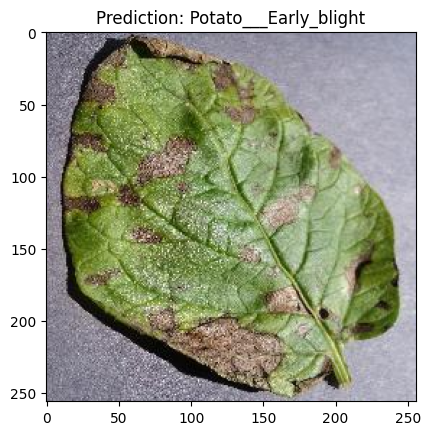

In [21]:
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Prediction: {model_prediction}")
plt.show()